<a href="https://colab.research.google.com/github/thanit456/NeuroSummary/blob/master/Project_NLP_2_stack_v2_LSTM_encoder_decoder_with_Attention_without_Teacher_forcing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Prep

### Cleaning
- remove special case

In [0]:
import re
def basic_cleaner(text) :
  special_char = '!|"|#|%|&|\'|,|-|/|:|;|<|=|>|@|_|`|~|\.|\$'.split("|")# type(result)
  nstr = text
  for special in special_char :
    nstr = re.sub(special+"+",special.replace('\\',''),nstr)
  nstr = re.sub("|^||'","",nstr).replace("|","").replace("*","").replace("  "," ").replace(u'\xa0', u' ')
  return nstr

In [0]:
df_content = thaigov_dataset.loc[:,'content'] 

In [0]:
df_content_clean = df_content.apply(basic_cleaner)
df_content_diff = df_content_clean[df_content != df_content_clean]

In [0]:
text = "asdasd. kk.... . .15%b%^&%$#$% 2$ $$$"
re.sub("\$+","$",text)

'asdasd. kk.... . .15%b%^&%$#$% 2$ $'

### Tokenize sentence by pythainlp

In [0]:
df_content_diff[:10]

NameError: ignored

In [0]:
df_content_clean.to_csv("b_thaigov_cleaner.csv",index=False)

In [0]:
!ls

b_thaigov_cleaner.csv  b_thaigov.csv  drive  sample_data


In [0]:
  !cp -r b_thaigov_cleaner.csv /content/drive/Shared\ drives/NeuroSummary/data/b_data_playground/b_thaigov_cleaner.csv


In [0]:
thaigov_dataset.loc[:,'content']  = df_content_clean

In [0]:
thaigov_dataset.loc[1,'content'][-101:]

'กับสิ่งแวดล้อม  น้อมนำศาสตร์พระราชามาประยุกต์ใช้อย่างเหมาะสม . กลุ่มประชาสัมพันธ์และเผยแพร่ สำนักโฆษก'

In [0]:
thaigov_dataset.to_csv("b_thaigov.csv", index=False)

In [0]:
!cp -r b_thaigov.csv /content/drive/Shared\ drives/NeuroSummary/data/b_data_playground/b_thaigov.csv


# Split Dataset\

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import re

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook
import copy

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
old_df = pd.read_pickle('/content/drive/Shared drives/NeuroSummary/data/all_deepcut_thaigov_1_24.pkl')
df = pd.DataFrame({'content': old_df['tokenized_deepcut_content'], 'headline': old_df['tokenized_deepcut_headline'], 'class': old_df['class_name']})

In [0]:
print(old_df.columns)

Index(['file_name', 'raw_content', 'reference', 'headline', 'date', 'content',
       'tokenized_deepcut_content', 'tokenized_deepcut_headline',
       'removed_stopwords_content', 'removed_stopwords_headline',
       'class_name'],
      dtype='object')


In [0]:
df_stop = pd.DataFrame({'content': old_df['removed_stopwords_content'], 'headline': old_df['removed_stopwords_headline'], 'class': old_df['class_name']})

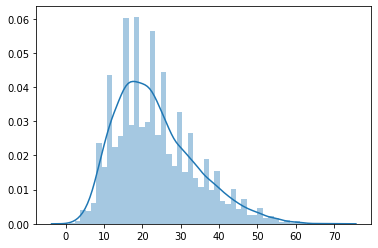

In [0]:
headline_dist = list(map(lambda x: len(x),list(df.headline)))
sns.distplot(headline_dist);

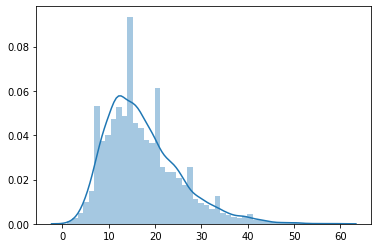

In [0]:
headline_dist = list(map(lambda x: len(x),list(df_stop.headline)))
sns.distplot(headline_dist);

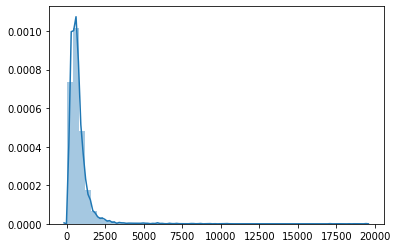

In [0]:
content_dist = list(map(lambda x: len(x),list(df.content)))
sns.distplot(content_dist);

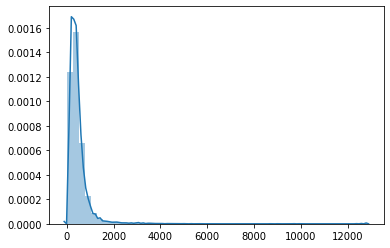

In [0]:
content_dist = list(map(lambda x: len(x),list(df_stop.content)))
sns.distplot(content_dist);

In [0]:
def remove_space_special(content_arr) :
  return list(filter(lambda x: x not in " (){}!,'`<>=@_:;,\'\"\\”“‘’",np.array(content_arr)))
# def replace_ห
df.headline = df.headline.apply(remove_space_special)
df.content = df.content.apply(remove_space_special)
df_stop.headline = df_stop.headline.apply(remove_space_special)
df_stop.content = df_stop.content.apply(remove_space_special)

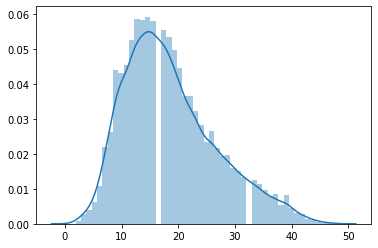

In [0]:
headline_dist = list(map(lambda x: len(x),list(df.headline)))
sns.distplot(headline_dist);

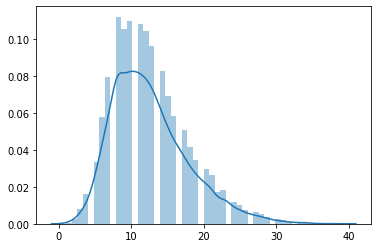

In [0]:
headline_dist = list(map(lambda x: len(x),list(df_stop.headline)))
sns.distplot(headline_dist);

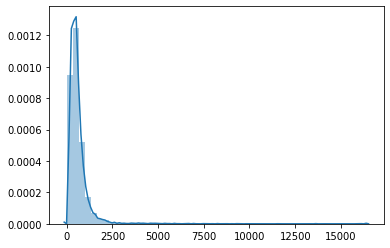

In [0]:
content_dist = list(map(lambda x: len(x),list(df.content)))
sns.distplot(content_dist);

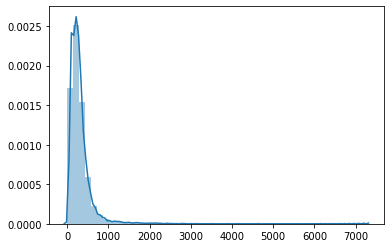

In [0]:
content_dist = list(map(lambda x: len(x),list(df_stop.content)))
sns.distplot(content_dist);

In [0]:
max_len_headline = max(df.headline.apply(lambda x: len(x)))
print("max len headline : ",max_len_headline)
max_len_content = max(df.content.apply(lambda x: len(x)))
print("max len content : ",max_len_content)

print("df shape :" ,df.shape)
max_len_headline_stop = max(df_stop.headline.apply(lambda x: len(x)))
print("max len headline stop: ",max_len_headline_stop)
max_len_content_stop = max(df_stop.content.apply(lambda x: len(x)))
print("max len content stop: ",max_len_content_stop)
# print("removed stop df shape :" ,df_stop.shape)


max len headline :  48
max len content :  16373
df shape : (17367, 3)
max len headline stop:  39
max len content stop:  7242


In [0]:
df = df[df.content.apply(lambda x: len(x) != 0)]
df.shape

(17337, 3)

In [0]:
import pickle
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/'
with open(THAIGOV_PATH + 'thai_gov_clean_cut.pkl', 'wb') as f:
  pickle.dump(df, f)
with open(THAIGOV_PATH + 'thai_gov_stop_clean_cut.pkl', 'wb') as f:
  pickle.dump(df_stop, f)

In [0]:
# content_len_dist = [(df.content[df.content.apply(lambda x: len(x) == n)].shape[0],n) for n in range(max_len_content)][0]
# content_len_dist

In [0]:
headline_len_dist = [(df_stop.headline[df_stop.headline.apply(lambda x: len(x) <= n)].shape[0],n) for n in range(max_len_headline_stop)]
headline_len_dist
# sns.distplot(headline_len_dist);
# len(df.content)

[(0, 0),
 (9, 1),
 (41, 2),
 (147, 3),
 (357, 4),
 (802, 5),
 (1564, 6),
 (2618, 7),
 (4100, 8),
 (5497, 9),
 (6948, 10),
 (8376, 11),
 (9757, 12),
 (11027, 13),
 (12117, 14),
 (13029, 15),
 (13798, 16),
 (14471, 17),
 (15019, 18),
 (15478, 19),
 (15870, 20),
 (16217, 21),
 (16443, 22),
 (16683, 23),
 (16839, 24),
 (16970, 25),
 (17068, 26),
 (17149, 27),
 (17217, 28),
 (17263, 29),
 (17294, 30),
 (17318, 31),
 (17334, 32),
 (17344, 33),
 (17358, 34),
 (17360, 35),
 (17363, 36),
 (17364, 37),
 (17366, 38)]

In [0]:
headline_len_dist = [(df.headline[df.headline.apply(lambda x: len(x) <= n)].shape[0],n) for n in range(max_len_headline)]
headline_len_dist
# sns.distplot(headline_len_dist);
# len(df.content)

[(0, 0),
 (1, 1),
 (12, 2),
 (55, 3),
 (119, 4),
 (221, 5),
 (400, 6),
 (754, 7),
 (1184, 8),
 (1903, 9),
 (2608, 10),
 (3346, 11),
 (4206, 12),
 (5162, 13),
 (6111, 14),
 (7079, 15),
 (8023, 16),
 (8928, 17),
 (9800, 18),
 (10611, 19),
 (11340, 20),
 (11936, 21),
 (12534, 22),
 (13061, 23),
 (13524, 24),
 (13908, 25),
 (14342, 26),
 (14696, 27),
 (15015, 28),
 (15336, 29),
 (15599, 30),
 (15846, 31),
 (16064, 32),
 (16269, 33),
 (16454, 34),
 (16614, 35),
 (16743, 36),
 (16883, 37),
 (16970, 38),
 (17103, 39),
 (17176, 40),
 (17225, 41),
 (17272, 42),
 (17296, 43),
 (17316, 44),
 (17326, 45),
 (17331, 46),
 (17336, 47)]

In [0]:
df = df[df.headline.apply(lambda x: len(x) <= 20)]
df_stop = df_stop[df_stop.headline.apply(lambda x: len(x) <= 20)]

In [0]:
df.shape

(11340, 3)

In [0]:
df

,content,headline,class
1,"[พลเอก ประยุทธ์ จันทร์โอชา, นายก, รัฐมนตรี, ได...","[สรุป, ประเด็น, นายก, รัฐมนตรี, กล่าว, ใน, ราย...",ข่าวทำเนียบรัฐบาล
2,"[รมว., แรงงาน, ยื่น, สัตยาบัน, อนุสัญญา, ILO, ...","[บิ๊กอู๋, ยื่น, สัตยาบัน, C, 188, ต่อ, ILO, แส...",ด้านความมั่นคง
3,"[ออมสิน, จัด, โปรพิเศษ, Thailand, Smart, Money...","[ออมสิน, จัด, โปรโมชั่น, พิเศษ, Thailand, Smar...",ด้านเศรษฐกิจ
7,"[เผย, เป็น, ผล, งาน, สำคัญ, และ, พระไตรปิฎก, ย...","[วธ., ร่วม, กับ, 4, หน่วย, งาน, จัด, งาน, พิธี...",ด้านวัฒนธรรมท่องเที่ยวฯ
8,"[ศาสตราจารย์พิเศษวิศิษฏ์ วิศิษฏ์สรอรรถ, ปลัด, ...","[กระทรวงยุติธรรม, พิจารณา, ร่าง, ระเบียบ, ฯ, ก...",ด้านกฎหมายฯ
...,...,...,...
17359,"[นายปรัก สุคน, Mr. Prak Sokhonn, รัฐมนตรี, อาว...","[รัฐมนตรี, อาวุโส, และ, รัฐมนตรี, ว่าการ, กระท...",ข่าวทำเนียบรัฐบาล
17360,"[นายก, รัฐมนตรี, เข้า, ร่วม, ประชุม, เพื่อ, ติ...","[นายก, รัฐมนตรี, ประชุม, พิจารณา, แนวทาง, การ,...",ข่าวทำเนียบรัฐบาล
17361,"[วัน, นี้, 30, ส.ค., 59, เวลา, 09, ., 15, น., ...","[นรม., ชื่นชม, สมุนไพร, และ, ผลิตภัณฑ์, สมุนไพ...",ข่าวทำเนียบรัฐบาล
17362,"[ที่, ประชุม, มี, มติ, เห็น, ชอบ, ร่าง, แผน, ป...","[รอง, นรม., พลเรือ, เอก ณรงค์, ฯ, เป็น, ประธาน...",ข่าวทำเนียบรัฐบาล


In [0]:
df_stop

,content,headline,class
0,"[ธนาคารอาคารสงเคราะห์, ธอส., ประกาศ, มาตรการ, ...","[ธอส., ประกาศ, มาตรการ, บรรเทา, เดือดร้อน, ลูก...",ด้านเศรษฐกิจ
1,"[พลเอก ประยุทธ์ จันทร์โอชา, นายก, รัฐมนตรี, ปร...","[สรุป, ประเด็น, นายก, รัฐมนตรี, รายการศาสตร์, ...",ข่าวทำเนียบรัฐบาล
2,"[รมว., แรงงาน, ยื่น, สัตยาบัน, อนุสัญญา, ILO, ...","[บิ๊กอู๋, ยื่น, สัตยาบัน, C, 188, ILO, เจตนารม...",ด้านความมั่นคง
3,"[ออมสิน, โปรพิเศษ, Thailand, Smart, Money, กรุ...","[ออมสิน, โปรโมชั่น, พิเศษ, Thailand, Smart, Mo...",ด้านเศรษฐกิจ
4,"[ศ.คลินิก, นพ.อุดม คชินทร, รมช., ศธ., ประชุม,...","[ม., มหิดล, เตรียม, ม.บูรพา ผลิต, พัฒนา, คน, ส...",ด้านการศึกษาฯ
...,...,...,...
17361,"[30, ส.ค., 59, เวลา, 09, ., 15, น., บริเวณ, หน...","[นรม., ชื่นชม, สมุนไพร, ผลิตภัณฑ์, สมุนไพร, ดี...",ข่าวทำเนียบรัฐบาล
17362,"[ประชุม, มติ, ชอบ, ร่าง, แผน, ดำเนิน, ส่งเสริม...","[รอง, นรม., พลเรือ, เอก ณรงค์, ประธาน, ประชุม,...",ข่าวทำเนียบรัฐบาล
17363,"[22, สิงหาคม, 2559, เวลา, 14, ., 00, น., บริเว...","[นายก, รัฐมนตรี, รัฐบาล, มุ่งมั่น, ปัญหา, พื้น...",ข่าวทำเนียบรัฐบาล
17364,"[22, สิงหาคม, 2559, เวลา, 14, ., 00, น., บริเว...","[นายก, รัฐมนตรี, ย้ำ, รัฐบาล, พัฒนา, โครงสร้าง...",ข่าวทำเนียบรัฐบาล


In [0]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [0]:
df.headline

In [0]:
df.content.apply(lambda x : x[:50])

In [0]:
train_df, val_test_df = train_test_split(df, test_size=0.33, random_state=42)
val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=123)

In [0]:
import pickle
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/'
with open(THAIGOV_PATH + 'train.pkl', 'wb') as f:
  pickle.dump(train_df, f)

with open(THAIGOV_PATH + 'val.pkl', 'wb') as f:
  pickle.dump(val_df, f)

with open(THAIGOV_PATH + 'test.pkl', 'wb') as f:
  pickle.dump(test_df, f)

In [0]:
train_df_stop, val_test_df_stop = train_test_split(df_stop, test_size=0.33, random_state=42)
val_df_stop, test_df_stop = train_test_split(val_test_df_stop, test_size=0.5, random_state=123)

In [0]:
import pickle
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/'
with open(THAIGOV_PATH + 'train_stop.pkl', 'wb') as f:
  pickle.dump(train_df_stop, f)

with open(THAIGOV_PATH + 'val_stop.pkl', 'wb') as f:
  pickle.dump(val_df_stop, f)

with open(THAIGOV_PATH + 'test_stop.pkl', 'wb') as f:
  pickle.dump(test_df_stop, f)

# Creade Dictionary

![alt text](https://)## load train,val,test_set

In [0]:
import pickle
import numpy as np
import keras
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
THAIGOV_PATH = '/content/drive/Shared drives/NeuroSummary/data/b_data_playground/thai_gov_split/'
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

**Choose *HAS_STOP_WORD* or *NO_STOP_WORD* `DATASET`**

In [0]:
# with open(THAIGOV_PATH + 'train_v2.pkl', 'rb') as f:
#   train_set = pickle.load(f)
# with open(THAIGOV_PATH + 'val_v2.pkl', 'rb') as f:
#   val_set = pickle.load(f)
# with open(THAIGOV_PATH + 'test_v2.pkl', 'rb') as f:
#   test_set = pickle.load(f)
# version_dataset = "not_remove_stopword"

In [0]:
with open(THAIGOV_PATH + 'train_stop_v2.pkl', 'rb') as f:
  train_set = pickle.load(f)
with open(THAIGOV_PATH + 'val_stop_v2.pkl', 'rb') as f:
  val_set = pickle.load(f)
with open(THAIGOV_PATH + 'test_stop_v2.pkl', 'rb') as f:
  test_set = pickle.load(f)
version_dataset = "remove_stopword"

In [0]:
## ! use only n first words for headline generation
def use_firt_n_words(df_content, n):
  new_ls = []
  for content in df_content:
    new_ls.append(content[:n])
  return new_ls

#define_n_first_words
n_first_content = 50
n_first_headline = 20

#trim sentence
words_train_contents = use_firt_n_words(train_set['content'], n=n_first_content)
words_train_headlines = use_firt_n_words(train_set['headline'], n=n_first_headline)
words_val_contents = use_firt_n_words(val_set['content'], n=n_first_content)
words_val_headlines = use_firt_n_words(val_set['headline'], n=n_first_headline)
words_test_contents = use_firt_n_words(test_set['content'], n=n_first_content)
words_test_headlines = use_firt_n_words(test_set['headline'], n=n_first_headline)

# generate gold_sum
gold_sum_train = list(map(lambda x: " ".join(x),words_train_headlines))
gold_sum_val = list(map(lambda x: " ".join(x),words_val_headlines))
gold_sum_test = list(map(lambda x: " ".join(x),words_test_headlines))

In [0]:
import collections
def create_index(input_data,threshold):
    input_text = [data for data in input_data]
    # counts of word type has to be above or equal threshold
    words = [word for sublist in input_text for word in sublist]
    print("words :",words)
    word_count_all = list()
    word_count = list()
    #use set and len to get the number of unique words
    word_count_all.extend(collections.Counter(words).most_common(len(set(words))))
    unkcnt = 0
    for (word,cnt) in word_count_all:
      if cnt >= threshold:
        word_count.append((word,cnt))
      else:
        unkcnt+=cnt
    #include a token for unknown word
    word_count.append(("UNK",unkcnt))
    #print out 10 most frequent words
    # print("top 10: ",word_count[:10])
    # print("bottom 10: ",word_count[-10:])
    dictionary = dict()
    dictionary["for_keras_zero_padding"] = 0
    for word in word_count:
      dictionary[word[0]] = len(dictionary)
    dictionary['<s>'] = len(dictionary) 
    dictionary['</s>'] = len(dictionary)
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    
    return dictionary, reverse_dictionary
dict_t, rev_dict_t = create_index(input_data=words_train_contents+words_train_headlines,threshold=0)
# dict_stop_t, rev_dict_stop_t = create_index(input_data=words_70_train_stop_contents+words_20_train_stop_headlines,threshold=0)
print('Vocab size (Content): ',len(dict_t))
# print('Vocab stop ?size (Content): ',len(dict_stop_t))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
print('Vocab size (Content): ',len(dict_t))
# print('Vocab stop size (Content): ',len(dict_stop_t))
maxlen_output = n_first_headline
maxlen = n_first_content
vocab_size = len(dict_t)
output_vocab_size = vocab_size

# m=15000
# Tx=maxlen
# Ty=maxlen_output

Vocab size (Content):  31180


In [0]:
def convert(input_data,dictionary) :
  X = list()
  for data in input_data:
    sub_data = []
    for word in data:
      if word in dictionary:
        sub_data.append(dictionary[word])
      else:
        sub_data.append(dictionary["UNK"])
    X.append(sub_data)
  return np.array(X)

In [0]:
X_train = convert(words_train_contents,dict_t)
y_train = convert(words_train_headlines,dict_t)
X_val = convert(words_val_contents,dict_t)
y_val = convert(words_val_headlines,dict_t)
X_test = convert(words_test_contents,dict_t)
y_test = convert(words_test_headlines,dict_t)

In [0]:
X_train = pad_sequences(X_train,maxlen=maxlen,padding='post')
y_train = pad_sequences(y_train,maxlen=maxlen_output,padding='post') 
X_val = pad_sequences(X_val,maxlen=maxlen,padding='post')
y_val = pad_sequences(y_val,maxlen=maxlen_output,padding='post') 
X_test = pad_sequences(X_test,maxlen=maxlen,padding='post')
# y_test = pad_sequences(y_test,maxlen=maxlen_output,padding='post') 
# y_val = list(y_val.swapaxes(0,1))

In [0]:
# # y_train = to_categorical(y_train, vocab_size)
# # y_val = to_categorical(y_val, vocab_size)
# # y_test = to_categorical(y_test, vocab_size)
# y_train = np.array(keras.utils.to_categorical(y_train, num_classes=vocab_size))
# y_val = np.array(keras.utils.to_categorical(y_val, num_classes=vocab_size))
# # y_test = np.array(keras.utils.to_categorical(y_test, num_classes=vocab_size))

# Create Model

In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0'

In [0]:
%matplotlib inline
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, Concatenate, Permute, Dot, Input, LSTM, Multiply,Add,Conv1D,GRU,TimeDistributed
from tensorflow.keras.layers import RepeatVector, Dense, Activation, Lambda, Embedding,concatenate,Reshape
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import load_model, Model
import tensorflow.keras.backend as K
import numpy as np

In [0]:
maxlen_output = n_first_headline
maxlen = n_first_content
vocab_size = len(dict_t)
output_vocab_size = vocab_size

# m=15000
# Tx=maxlen
# Ty=maxlen_output
BATCH_SIZE = 64

In [0]:
from random import randrange
from tensorflow.keras.activations import softmax
from tensorflow.keras.layers import Lambda
import tensorflow as tf
def one_step_attention(a, s_prev, n_unit):
    repeator = RepeatVector(maxlen)
    s_prev = repeator(s_prev)
    def softMaxAxis1(x):
      return softmax(x,axis=1)

    concatenator = Concatenate(axis=-1)
    activatorSoftmax = Lambda(softMaxAxis1) 
    dotor = Dot(axes = 1) 

    concat = concatenator([s_prev, a[:,:,n_unit//2:]])
    fattn_1 = Dense(n_unit//2)
    fattn_2 = Dense(maxlen_output, activation = "tanh")
    fattn_3 = Dense(1, activation = "relu")
    M = fattn_2(fattn_1(concat))
    attention_scores = activatorSoftmax(fattn_3(M))
    context = dotor([attention_scores,a[:,:,:n_unit//2]])

    return context # return whatever you need to complete this homework 

def define_attention_models(n_input=maxlen,n_output=maxlen_output,n_units=32,dropout_rate=0.0) :
  #define training encoder model
  encoder_inputs = Input(shape=(maxlen,), name="encoder_input")
  embed = Embedding(vocab_size, 200,  name="EMBEDDING")
  encoder_embedding = embed(encoder_inputs)
  # add dropout to LSTM
  # gru = Bidirectional(GRU(n_units//2,return_sequences=True, name="encoderGRU"))
  encoder_LSTM  = LSTM(n_units,return_state=True,return_sequences = True, dropout=dropout_rate, name="encoderLSTM")

  # gru_output =  gru(encoder_embedding)
  h,s,c = encoder_LSTM(encoder_embedding)

  # encoder_states = [s, c]
  # define training decoder model
  decoder_inputs = Input(shape=(maxlen_output, ), name="decoder_input")
  decoder_GRU_cell = GRU(n_units//2)
  decoder_LSTM_cell = LSTM(n_units, return_state=True, dropout=dropout_rate, name="decoder_LSTM_CELL_1")
  decoder_LSTM_cell2 = LSTM(n_units, return_state=True, dropout=dropout_rate, name="decoder_LSTM_CELL_2")
  decoder_dense  = Dense(vocab_size, activation='softmax')
  add_layer = tf.keras.layers.Add()
#   s0 = Input(shape=(n_units,), name='s0')
#   c0 = Input(shape=(n_units,), name='c0')
  s1 = s
  c1 = c
  # Initialize empty list of outputs
  start_input = Input(shape=(1,),name="START")
  outputs2 = list()
  for t in range(maxlen_output) :
    context = one_step_attention(h,c1,n_units)
    s1, _, c1 = decoder_LSTM_cell(context, initial_state=[s1,c1])
    if(len(outputs2) == 0):
        # print("------start feed------")
        s2 = s1
        c2 = c1
        feed_input = embed(start_input)
    elif(randrange(10) >= 0 ):
      # print("------force feed------")
      feed_input = embed(decoder_inputs[:,t-1])
      feed_input = tf.expand_dims(feed_input, axis=1)
      s2 = add_layer([s1,s2])
      c2 = add_layer([c1,c2])
    else :
      # print("------prev feed------")
      point = tf.math.argmax(decoder_output2, axis=1)
      feed_input = embed(point)
      feed_input = tf.expand_dims(feed_input, axis=1)
      s2 = add_layer([s1,s2])
      c2 = add_layer([c1,c2])
    s2, _, c2 = decoder_LSTM_cell2(feed_input, initial_state=[s2,c2])
    decoder_output2 = decoder_dense(s2)
    outputs2.append(decoder_output2)
  model = Model(inputs=[encoder_inputs,start_input, decoder_inputs],outputs=outputs2)

  # define inference model 1
  # define inference model 2
  # s3 = s
  # c3 = c
  # c4 = c
  s1 = s
  c1 = c
  outputs2 = list()
  outputs1 = list()
  for t in range(maxlen_output) :
    context = one_step_attention(h,c1,n_units)
    s1, _, c1 = decoder_LSTM_cell(context, initial_state=[s1,c1])
    decoder_output1 = decoder_dense(s1)
    outputs1.append(decoder_output1)
    if(len(outputs2) == 0):
        # print("------start feed------")
        s2 = s1
        c2 = c1
        feed_input = embed(start_input)
    else :
      # print("------prev feed------")
      point = tf.math.argmax(decoder_output2, axis=1)
      feed_input = embed(point)
      feed_input = tf.expand_dims(feed_input, axis=1)
      s2 = add_layer([s1,s2])
      c2 = add_layer([c1,c2])
    s2, _, c2 = decoder_LSTM_cell2(feed_input, initial_state=[s2,c2])
    decoder_output2 = decoder_dense(s2)
    outputs2.append(decoder_output2)
  inference_model1 = Model(inputs=[encoder_inputs,start_input],outputs=outputs1)
  inference_model2 = Model(inputs=[encoder_inputs,start_input],outputs=outputs2)
  return model,inference_model1, inference_model2

In [0]:
model = define_attention_models(n_units=128)
model[0].summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
START (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
encoder_input (InputLayer)      [(None, 50)]         0                                            
__________________________________________________________________________________________________
EMBEDDING (Embedding)           multiple             6236000     encoder_input[0][0]              
                                                                 START[0][0]                      
                                                                 tf_op_layer_strided_slice_499[0][
                                                                 tf_op_layer_strided_slice_

In [0]:
import numpy as np
import math
from tensorflow.keras.utils import Sequence
# Here, `x_set` is list of path to the images
# and `y_set` are the associated classes.

class SequenceGenerator(Sequence):

    def __init__(self, x_set, y_set, batch_size,num_classes,pred_option):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.pred_option = pred_option

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        #  y = list(map(lambda mem :np.append(mem,[len(dict_t)-1]),y))
        # y_shift = list(map(lambda mem :np.append([len(dict_t)-2], mem[:-1]),y))
        # y_shift = pad_sequences(y_shift,maxlen=maxlen_output,padding='post')
        # X = np.array(keras.utils.to_categorical(X, num_classes=self.n_classes), dtype=object)
        # y_shift = np.array(keras.utils.to_categorical(y_shift, num_classes=self.n_classes))
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_now = len(batch_x)
        start_input = np.array([dict_t["<s>"]] * batch_now)
        if(self.pred_option) :
          return [np.array(batch_x), start_input]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y_cat = np.array(tf.keras.utils.to_categorical(batch_y, self.num_classes))
        # print(" ---- ")
        # print(np.array(batch_x).shape)
        # print(np.array(start_input).shape)
        # print(np.array(batch_y).shape)

        # s0 = np.zeros((self.batch_size, 64))
        # c0 = np.zeros((self.batch_size, 64))
        # print(np.array(list(batch_y.swapaxes(0,1).shape)))
        # return [np.array(batch_x),s0,c0], list(batch_y.swapaxes(0,1))
        return [np.array(batch_x),start_input,np.array(batch_y)], list(batch_y_cat.swapaxes(0,1))

In [0]:
drive_path = '/content/drive/Shared drives/NeuroSummary/evaluation/result/thai_gov/50_20/logB'
optimizer = 'rmsprop'
lr=0.01
epoch_num=30
batch_size = 64
# units=256
dropout_rate = 0.0
type_dataset = "train"

In [0]:
# from my_classes import DataGenerator

# Parameters
params = {
          'dimX': maxlen,
          'dimY': maxlen_output,
          'batch_size': batch_size,
          'n_classes': vocab_size,
          'n_channels': 1,
          'shuffle': True
          }
units_to_train = [32,50,64,128,256]
# Generators
training_generator_seq = SequenceGenerator(np.array(X_train),np.array(y_train),batch_size,vocab_size,0)
validation_generator_seq = SequenceGenerator(np.array(X_val),np.array(y_val),batch_size,vocab_size,0)
# pred_generator_seq = SequenceGenerator(x_set=np.array(X_val),batch_size = batch_size,num_classes = vocab_size,pred_option=1)

In [0]:
training_generator_seq[0][0][1].shape

(64,)

In [0]:
model[0].compile(loss='categorical_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'],experimental_run_tf_function=False)
unit = 128
checkpoint_path=  drive_path + f'/v5_{n_first_content}_{n_first_headline}_attention_val_loss_watch:epoch:{epoch_num},lr={lr},{optimizer},batch_size:{batch_size},LSTM_units:{unit},dataset:{type_dataset},dropout:{dropout_rate}.hdf5'
callback_list = [
  ModelCheckpoint(checkpoint_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min'), 
  EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5),
  # ReduceLROnPlateau(monitor='val_loss', factor=0.8, patience=2, min_lr=1e-10),
]


In [0]:
for epoch,batch in [[30,128]] :
  training_generator_seq = SequenceGenerator(np.array(X_train),np.array(y_train),batch,vocab_size,0)
  validation_generator_seq = SequenceGenerator(np.array(X_val),np.array(y_val),batch,vocab_size,0)
  model[0].fit(x=training_generator_seq,validation_data=validation_generator_seq,callbacks=callback_list,epochs=epoch)

Epoch 1/30
91/91 [==============================] - ETA: 0s - loss: 107.1466 - dense_605_loss: 6.6137 - dense_605_1_loss: 7.2978 - dense_605_2_loss: 7.7621 - dense_605_3_loss: 7.9968 - dense_605_4_loss: 8.0934 - dense_605_5_loss: 8.0355 - dense_605_6_loss: 7.8359 - dense_605_7_loss: 7.4126 - dense_605_8_loss: 6.7887 - dense_605_9_loss: 6.1966 - dense_605_10_loss: 5.5722 - dense_605_11_loss: 4.9205 - dense_605_12_loss: 4.3683 - dense_605_13_loss: 3.7661 - dense_605_14_loss: 3.3016 - dense_605_15_loss: 2.8345 - dense_605_16_loss: 2.5236 - dense_605_17_loss: 2.2177 - dense_605_18_loss: 1.9176 - dense_605_19_loss: 1.6914 - dense_605_accuracy: 0.0308 - dense_605_1_accuracy: 0.0307 - dense_605_2_accuracy: 0.0152 - dense_605_3_accuracy: 0.0163 - dense_605_4_accuracy: 0.0264 - dense_605_5_accuracy: 0.0490 - dense_605_6_accuracy: 0.0893 - dense_605_7_accuracy: 0.1489 - dense_605_8_accuracy: 0.2320 - dense_605_9_accuracy: 0.3109 - dense_605_10_accuracy: 0.3921 - dense_605_11_accuracy: 0.4744 - d

In [0]:
 model[1].save(f"/content/v5.0 _{version_dataset}_remove_stopword_{n_first_content}_{n_first_headline}_attention_best.h5")

In [0]:
!pip install rouge
from rouge import Rouge 
def evaluate_result(gold_sum,pred_sum) : 
  rouge = Rouge()
  avg_scores = rouge.get_scores(pred_sum, gold_sum, avg=True)
  return avg_scores


In [0]:
def pred(n_batch,generator,model) :
  pred_sentences = []
  for i in range(len(generator)) :
    output = np.array(model.predict(generator[i])).swapaxes(0,1).tolist()
    for pred in output:
      # print(len(pred))
      decoded_sentence  = ''
      for token in pred :
        # print(len(token))
        sampled_token_index = np.argmax(token)
        if(sampled_token_index == 0) :
          continue
        decoded_sentence = decoded_sentence + " " + rev_dict_t[sampled_token_index]
      pred_sentences.append(decoded_sentence.strip())
  return pred_sentences

In [0]:
n_batch = 50
training_generator = SequenceGenerator(np.array(X_train),np.array(y_train),n_batch,vocab_size,1)
validation_generator = SequenceGenerator(np.array(X_val),np.array(y_val),n_batch,vocab_size,1)
test_generator = SequenceGenerator(np.array(X_test),np.array(y_test),n_batch,vocab_size,1)

rouge = {}
test_pred_2 = pred(n_batch,test_generator,model[2])
rouge["test2"] = evaluate_result(test_pred_2,gold_sum_test)
print(rouge["test2"])
rouge["train"] = evaluate_result(train_pred,gold_sum_train,)
print(rouge["train"])
val_pred = pred(n_batch,validation_generator,model[2])
rouge["val"] = evaluate_result(val_pred,gold_sum_val)
print(rouge["val"])

- load modelX